# **Libararies**

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install openpyxl



# **Data Cleaning and Preparation**

In [575]:
folder_path='/content/drive/MyDrive/D1/Data/Final Project'
files = os.listdir(folder_path)
dfs = []

# Get to read each file seperately
for filename in files:
   # create file_path
  file_path = folder_path + '/' + filename
  if filename.endswith('.csv'):
    df = pd.read_csv(file_path)
    dfs.append(df)
  elif filename.endswith('.xlsx'):
    Demand=pd.read_excel(file_path)

# Combined all dataframes into one df
Energy = pd.concat(dfs, ignore_index=True)

Energy


,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
...,...,...,...,...,...
1380247,MAC000069,"20:00:00 13,12,05",0.061,G,C
1380248,MAC000069,"20:30:00 13,12,05",0.090,G,C
1380249,MAC000069,"21:00:00 13,12,05",0.069,G,C
1380250,MAC000069,"21:30:00 13,12,05",0.084,G,C


In [576]:
Demand

,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


 **Data info**

In [577]:
Energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380252 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cell_id                  1380252 non-null  object 
 1   DateTime                 1380252 non-null  object 
 2   KWH/hh (per half hour)   1380252 non-null  float64
 3   site_id                  1380252 non-null  object 
 4   region                   1380252 non-null  object 
dtypes: float64(1), object(4)
memory usage: 52.7+ MB


In [578]:
Demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


**Data Nan Value**

In [579]:
Energy.isna().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0


In [580]:
Demand.isna().sum()

,0
DemandDateTime,0
Demand,0


**Data Duplicated**

In [581]:
print("Duplicated of Energy data  are: ",Energy.duplicated().sum())

Duplicated of Energy data  are:  942


In [582]:
print("Duplicated of Demand data are: ",Demand.duplicated().sum())

Duplicated of Demand data are:  0


**Delete Duplicated**

In [583]:
Energy.drop_duplicates(inplace=True)
#make sure from remove duplicated data
print("Duplicated of data are: ",Energy.duplicated().sum())

Duplicated of data are:  0


**make value which have the same value as same name In Demand Dataframe**

In [584]:
#to show rows which have same content but not same name
Demandtype=Demand['Demand']
Demandtype=Demandtype.drop_duplicates()
Demandtype

,Demand
0,Normal
172,Low
268,Normall
334,High
17346,normal
17381,high


In [585]:
#replace to make content the same
Demand= Demand.replace(['Normall','normal'],'Normal')
Demand= Demand.replace(['High','high'],'High')
Demand= Demand.replace(['Low','low'],'Low')

**before converting**

In [586]:
Energy

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
...,...,...,...,...,...
1380247,MAC000069,"20:00:00 13,12,05",0.061,G,C
1380248,MAC000069,"20:30:00 13,12,05",0.090,G,C
1380249,MAC000069,"21:00:00 13,12,05",0.069,G,C
1380250,MAC000069,"21:30:00 13,12,05",0.084,G,C


In [587]:
Demand

,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


**Transfer Format of DataTime**

In [588]:
Energy['DateTime'] = pd.to_datetime(Energy['DateTime'], format='%H:%M:%S %y,%d,%m', errors='coerce')



In [589]:
Energy

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
...,...,...,...,...,...
1380247,MAC000069,2013-05-12 20:00:00,0.061,G,C
1380248,MAC000069,2013-05-12 20:30:00,0.090,G,C
1380249,MAC000069,2013-05-12 21:00:00,0.069,G,C
1380250,MAC000069,2013-05-12 21:30:00,0.084,G,C


**Rename column in DemandDateTime to DateTime**

In [590]:
Demand.rename(columns={'DemandDateTime':'DateTime'},inplace=True)

**merged two dataframe withtime and date**

In [591]:
collecteddata=pd.merge(Energy,Demand,on='DateTime',how='inner')

**Check data after merged**

In [592]:
collecteddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379310 entries, 0 to 1379309
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1379310 non-null  object        
 1   DateTime                 1379310 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1379310 non-null  float64       
 3   site_id                  1379310 non-null  object        
 4   region                   1379310 non-null  object        
 5   Demand                   1379310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 63.1+ MB


In [593]:
collecteddata.isna().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0
Demand,0


** **

**Seprate Date Time to Date and Time**

In [594]:
collecteddata['Date'] = pd.to_datetime(collecteddata['DateTime']).dt.date
collecteddata['Time'] = pd.to_datetime(collecteddata['DateTime']).dt.time
collecteddata

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,Date,Time
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,2013-01-01,00:00:00
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,2013-01-01,00:30:00
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,2013-01-01,01:00:00
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,2013-01-01,01:30:00
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,2013-01-01,02:00:00
...,...,...,...,...,...,...,...,...
1379305,MAC000069,2013-05-12 20:00:00,0.061,G,C,Normal,2013-05-12,20:00:00
1379306,MAC000069,2013-05-12 20:30:00,0.090,G,C,Normal,2013-05-12,20:30:00
1379307,MAC000069,2013-05-12 21:00:00,0.069,G,C,Normal,2013-05-12,21:00:00
1379308,MAC000069,2013-05-12 21:30:00,0.084,G,C,Normal,2013-05-12,21:30:00


In [595]:
collecteddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379310 entries, 0 to 1379309
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1379310 non-null  object        
 1   DateTime                 1379310 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1379310 non-null  float64       
 3   site_id                  1379310 non-null  object        
 4   region                   1379310 non-null  object        
 5   Demand                   1379310 non-null  object        
 6   Date                     1379310 non-null  object        
 7   Time                     1379310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 84.2+ MB


# **Feature Engineering**

**Divided Date for year month day**

In [596]:
collecteddata['Year'] = pd.to_datetime(collecteddata['DateTime']).dt.year
collecteddata['Month'] = pd.to_datetime(collecteddata['DateTime']).dt.month
collecteddata['Day'] = pd.to_datetime(collecteddata['DateTime']).dt.day

**Day of Week**



```
give  a clear view of how energy consumption varies across different days of the week, helping you understand if certain days have higher or lower consumption.


```



In [597]:
collecteddata['Day_of_Week'] = pd.to_datetime(collecteddata['DateTime']).dt.day_name()

**Show if The Day is Holiday or not**



```
A binary feature 'Is_Holiday' was created to differentiate between holiday and non-holiday periods, aiding in the analysis of consumption patterns during special occasions.
```



In [598]:
collecteddata['Is_Holiday'] = np.where(collecteddata['Day_of_Week'].isin(['Friday', 'Saturday']), 'Holiday', 'Not Holiday')

**Divided Time into hour**

In [599]:
collecteddata['Hour'] = collecteddata['DateTime'].dt.hour


**Divided Time to Day period [morning , afternoon ,Evening, Night]**



In [600]:
collecteddata['DayPeriod'] = np.where(
    (collecteddata['Hour'] >= 6) & (collecteddata['Hour'] < 12), "Morning",
    np.where((collecteddata['Hour'] >= 12) & (collecteddata['Hour'] < 18), "Afternoon",
             np.where((collecteddata['Hour'] >= 18) & (collecteddata['Hour'] < 24), "Evening", "Night"))
)

In [601]:
collecteddata

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,Date,Time,Year,Month,Day,Day_of_Week,Is_Holiday,Hour,DayPeriod
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,2013-01-01,00:00:00,2013,1,1,Tuesday,Not Holiday,0,Night
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,2013-01-01,00:30:00,2013,1,1,Tuesday,Not Holiday,0,Night
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,2013-01-01,01:00:00,2013,1,1,Tuesday,Not Holiday,1,Night
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,2013-01-01,01:30:00,2013,1,1,Tuesday,Not Holiday,1,Night
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,2013-01-01,02:00:00,2013,1,1,Tuesday,Not Holiday,2,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379305,MAC000069,2013-05-12 20:00:00,0.061,G,C,Normal,2013-05-12,20:00:00,2013,5,12,Sunday,Not Holiday,20,Evening
1379306,MAC000069,2013-05-12 20:30:00,0.090,G,C,Normal,2013-05-12,20:30:00,2013,5,12,Sunday,Not Holiday,20,Evening
1379307,MAC000069,2013-05-12 21:00:00,0.069,G,C,Normal,2013-05-12,21:00:00,2013,5,12,Sunday,Not Holiday,21,Evening
1379308,MAC000069,2013-05-12 21:30:00,0.084,G,C,Normal,2013-05-12,21:30:00,2013,5,12,Sunday,Not Holiday,21,Evening


# **Data insights**



1. Identify outliers or abnormal spikes in KWH/hh (Detect unusual energy consumption patterns that deviate from the normal expected behavior, such as sudden spikes during non-peak hours)
2.   Identify regions with higher or lower energy consumption, and determine whether energy usage is higher on specific days, hours, or during holidays
4.   Compare energy consumption during Is_Holiday periods vs. non-holiday periods
5. Investigate how energy consumption is distributed across different DayPeriod (Morning, Afternoon, Evening,Night).
6. saving cost for concumption of Energy




# **Show outlier in data**

In [602]:
! pip install pyod

**Using Boxblot to Identify outliers or abnormal spikes in KWH/hh**

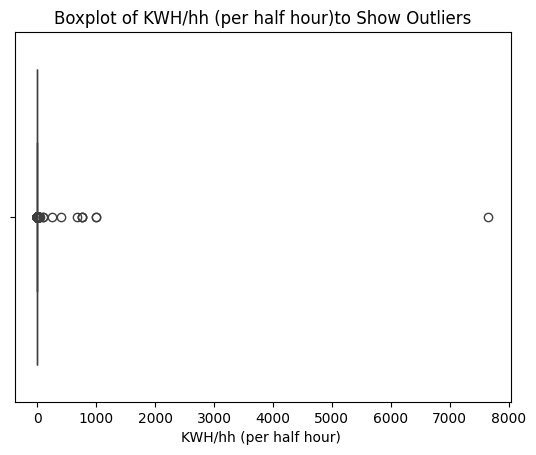

In [603]:
# Plot a boxplot for KWH/hh
sns.boxplot(x=collecteddata['KWH/hh (per half hour) '])
plt.title('Boxplot of KWH/hh (per half hour)to Show Outliers')
plt.show()

**Anomly Detection For KWH/hh (per half hour) using MAD  and IQR**

**Using MAD**

In [604]:
from pyod.models.mad import MAD

# Column needs to be checked
data = collecteddata['KWH/hh (per half hour) ']
data = data.values.reshape(-1,1)

# Initiate the Model
mad_detector = MAD(threshold = 3.5)

# fitting the model
mad_detector.fit(data)

collecteddata['MAD_outlier']= mad_detector.labels_

In [605]:
collecteddata['MAD_outlier'].value_counts()

,count
MAD_outlier,
0,1261014
1,118296


**Using IQR**

In [606]:
# Calculating AD using IQR for KWH/hh (per half hour Col.
q1 = np.quantile(collecteddata['KWH/hh (per half hour) '], 0.25)
q3 = np.quantile(collecteddata['KWH/hh (per half hour) '], 0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

collecteddata[' AD_KWH/hh'] = np.where((collecteddata['KWH/hh (per half hour) '] < lower_limit) | (collecteddata['KWH/hh (per half hour) ']> upper_limit), 1, 0)

collecteddata[' AD_KWH/hh'].value_counts()

,count
AD_KWH/hh,
0,1259093
1,120217


**i will use MAD  to handel anomly because range of data is very high and non normal distribution**

In [607]:
#imputation ==> replace anomly with mean
collecteddata['KWH/hh (per half hour) '] = np.where(collecteddata['MAD_outlier'] == 1, collecteddata['KWH/hh (per half hour) '].mean(), collecteddata['KWH/hh (per half hour) '])
collecteddata.drop('MAD_outlier', axis=1, inplace=True)

# **Analysis Exploration**
---


**Identify regions with higher or lower energy consumption, and determine whether energy usage is higher on specific months ,days, hours, or during holidays**




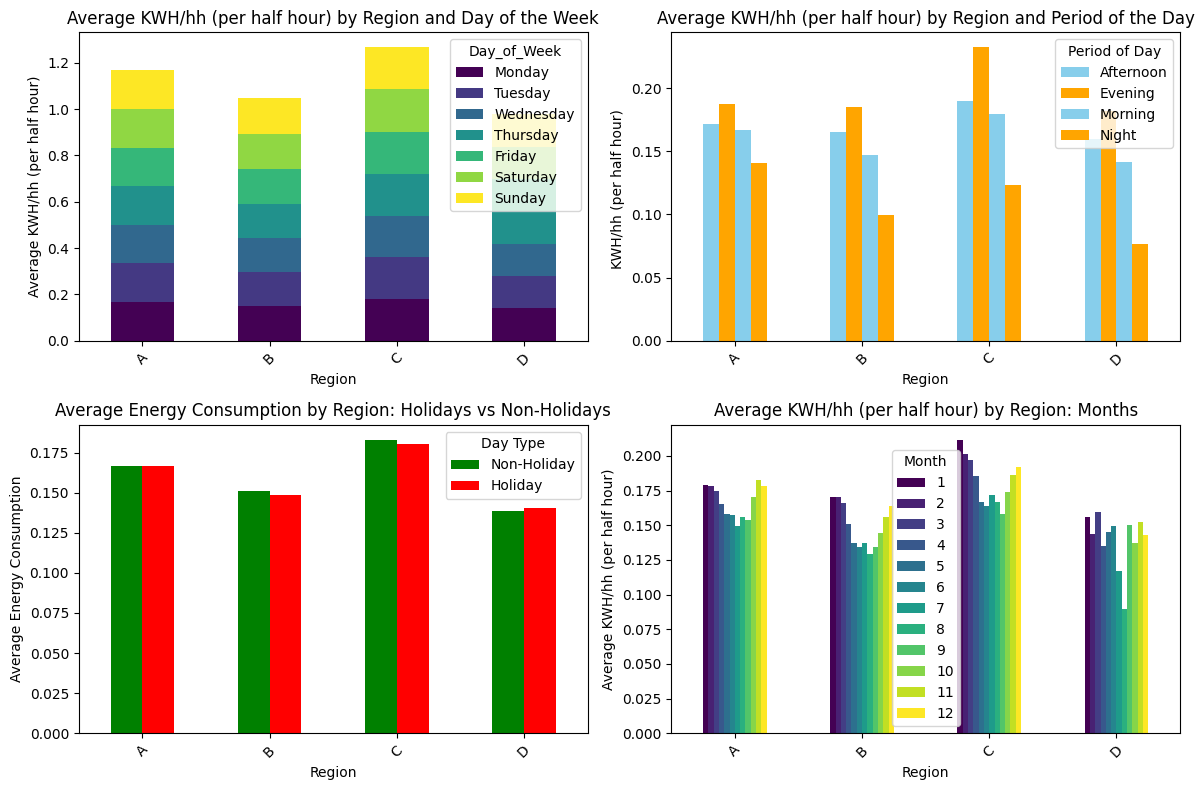

In [608]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize as needed

# 1. Energy Consumption by Region and Day of Week
region_day_consumption = collecteddata.groupby(['region', 'Day_of_Week'])['KWH/hh (per half hour) '].mean().unstack()
region_day_consumption.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(
    kind='bar', stacked=True, ax=axes[0, 0], cmap='viridis')  # Use axes[0, 0] for the first subplot
axes[0, 0].set_title('Average KWH/hh (per half hour) by Region and Day of the Week')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Average KWH/hh (per half hour)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Energy Consumption by Region and Period of day
region_period_consumption = collecteddata.groupby(['region', 'DayPeriod'])['KWH/hh (per half hour) '].mean().unstack()
region_period_consumption.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'orange'])  # Use axes[0, 1] for the second subplot
axes[0, 1].set_title('Average KWH/hh (per half hour) by Region and Period of the Day')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('KWH/hh (per half hour) ')
axes[0, 1].legend(title='Period of Day')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Energy Consumption by Region and Holiday vs Non-Holiday
region_holiday_consumption = collecteddata.groupby(['region', 'Is_Holiday'])['KWH/hh (per half hour) '].mean().unstack()
region_holiday_consumption.columns = ['Non-Holiday', 'Holiday']
region_holiday_consumption.plot(kind='bar', ax=axes[1, 0], color=['green', 'red'])  # Use axes[1, 0] for the third subplot
axes[1, 0].set_title('Average Energy Consumption by Region: Holidays vs Non-Holidays')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Average Energy Consumption')
axes[1, 0].legend(title='Day Type')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. KWH/hh (per half hour) by region : months
region_month_consumption = collecteddata.groupby(['region', 'Month'])['KWH/hh (per half hour) '].mean().unstack()
region_month_consumption.plot(kind='bar', ax=axes[1, 1], cmap='viridis')  # Use axes[1, 1] for the fourth subplot
axes[1, 1].set_title('Average KWH/hh (per half hour) by Region: Months')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Average KWH/hh (per half hour)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

***at conculsion of visualization that refer to the region  have difference of consumption in Days , months , holiday , period of Day***

---



**Energy consumption is likely to have peak times during certain Period**

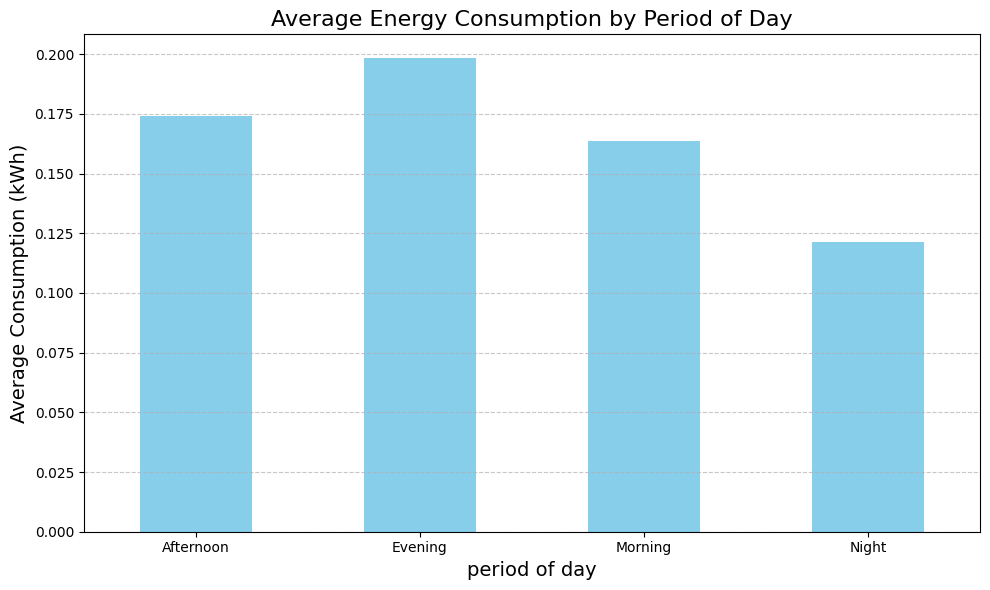

In [609]:
# Group data by hour and calculate average KWH/hh (per half hour) per Period of Day
Dayperiod_consumption = collecteddata.groupby('DayPeriod')['KWH/hh (per half hour) '].mean()

# Plot the hourly consumption
plt.figure(figsize=(10, 6))
Dayperiod_consumption.plot(kind='bar', color='skyblue')
plt.title('Average Energy Consumption by Period of Day', fontsize=16)
plt.xlabel('period of day', fontsize=14)
plt.ylabel('Average Consumption (kWh)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***at the conculsion of this visualization the period of day of using Energy is Deffernece  Evening is the most time in using Energy***

---



**Compare between Holiday and non Holiday in using of Energy**

Holiday KWH/hh (per half hour) Mean: 0.16530235743570904
Non-Holiday KWH/hh (per half hour) Mean: 0.16401844188999098


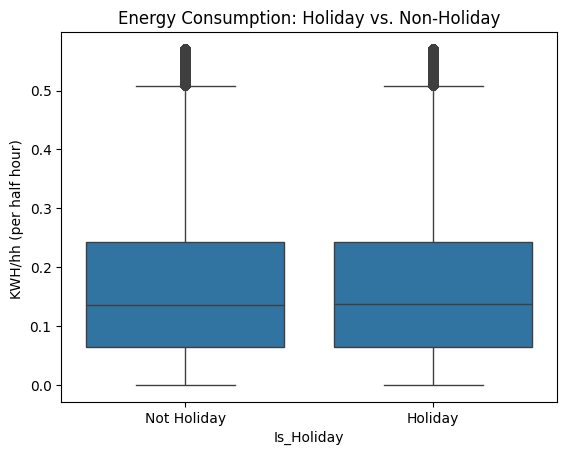

In [610]:
# Separate holiday and non-holiday data
holiday_data = collecteddata[collecteddata['Is_Holiday'] == 'Holiday']  # Filter for 'Holiday'
non_holiday_data = collecteddata[collecteddata['Is_Holiday'] == 'Not Holiday']  # Filter for 'Not Holiday'

# Compute summary statistics
holiday_mean = holiday_data['KWH/hh (per half hour) '].mean()
non_holiday_mean = non_holiday_data['KWH/hh (per half hour) '].mean()

print(f"Holiday KWH/hh (per half hour) Mean: {holiday_mean}")
print(f"Non-Holiday KWH/hh (per half hour) Mean: {non_holiday_mean}")

# Visualize the data
sns.boxplot(x='Is_Holiday', y='KWH/hh (per half hour) ', data=collecteddata)
plt.title('Energy Consumption: Holiday vs. Non-Holiday')
plt.show()

**at the end of this visulaization appear that as (mean) the difference between holiday and not holiday isn't great**


---



# **Statistical Hypothesis Testing**
---



# **Numeric Data test**


**Does the holiday significantly affect energy consumption (KWH/hh (per half hour))?**


*   H0: holiday does not have a significant effect on KWH/hh (per half hour).
*   H1:holiday has a significant effect on KWH/hh (per half hour).

In [611]:
#Divided in holiday and non holiday in KWH/hh (per half hour)
holiday_kwh = collecteddata[collecteddata['Is_Holiday'] == 'Holiday']['KWH/hh (per half hour) ']
nonholiday_kwh = collecteddata[collecteddata['Is_Holiday'] == 'Not Holiday']['KWH/hh (per half hour) ']

In [612]:
from scipy.stats import ttest_ind

t_test, p_value = ttest_ind(holiday_kwh, nonholiday_kwh)

print(f"T-statistic: {t_test}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print('Reject H0')
else:
  print('Fail to Reject H0')

T-statistic: 5.4677441056006435
P-value: 4.558779783531294e-08
Reject H0


**Visualize for this hypothesis**

<ipython-input-613-13f5542ccc17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


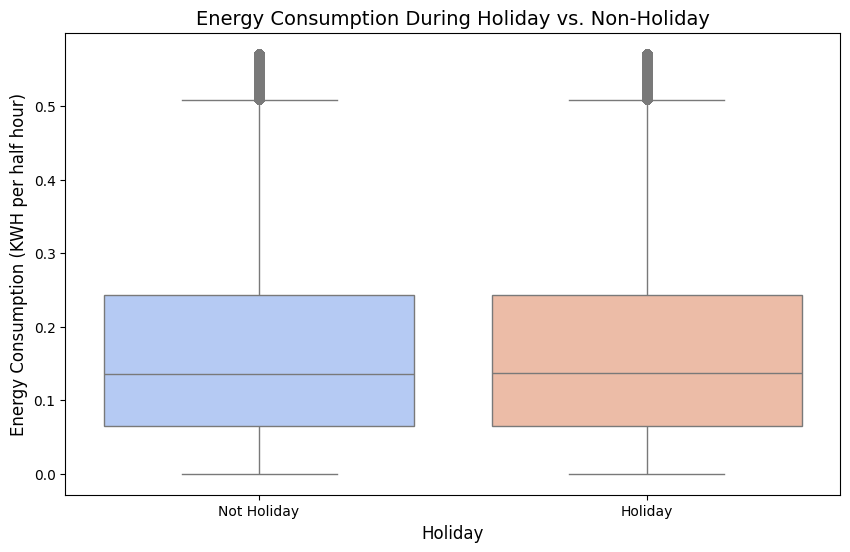

In [613]:
# Boxplot for visual comparison
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=collecteddata,
    x='Is_Holiday',
    y='KWH/hh (per half hour) ',
    palette='coolwarm'
)
plt.title('Energy Consumption During Holiday vs. Non-Holiday', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Energy Consumption (KWH per half hour)', fontsize=12)
plt.show()

In [614]:
!pip install pingouin


**Does the region significantly affect energy consumption KWH/hh (per half hour)?**


*   H0: Region does not have a significant effect on KWH/hh (per half hour).
*   H1:Region has a significant effect on KWH/hh (per half hour).



In [615]:
import pingouin as pg

# Apply ANOVA Test
anova_result=pg.anova(data = collecteddata, dv = 'KWH/hh (per half hour) ', between = 'region')


# Interpret the result
alpha = 0.05  # Significance level

if anova_result['p-unc'][0] < alpha:
    print("Reject the null hypothesis:Region has a significant effect on KWH/hh (per half hour)..")
else:
    print("Fail to reject the null hypothesis:Region does not have a significant effect on KWH/hh (per half hour.")

Reject the null hypothesis:Region has a significant effect on KWH/hh (per half hour)..


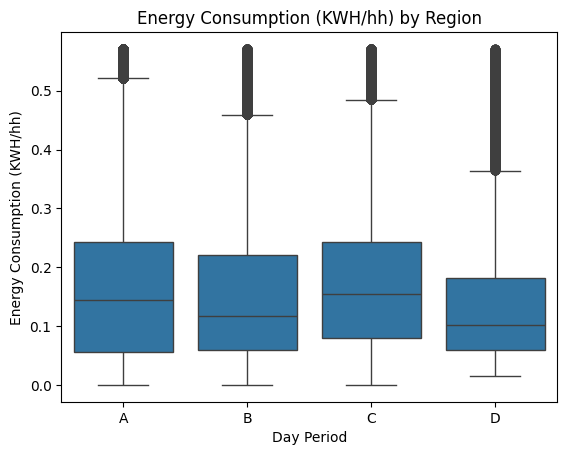

In [616]:
# Create a box plot to visualize energy consumption by Region
sns.boxplot(x='region', y='KWH/hh (per half hour) ', data=collecteddata)
plt.title('Energy Consumption (KWH/hh) by Region')
plt.xlabel('Day Period')
plt.ylabel('Energy Consumption (KWH/hh)')
plt.show()


**Is there a relationship between the time of day and energy consumption?**



*   H0:time of day energy doesn't have a significant effect on energy consumption
*   H1:time of day has significant effect on energy consumption


   



In [617]:
import pingouin as pg

# Apply ANOVA Test
anova_result=pg.anova(data = collecteddata, dv = 'KWH/hh (per half hour) ', between = 'DayPeriod')

# Interpret the result
alpha = 0.05  # Significance level

if anova_result['p-unc'][0] < alpha:
    print("Reject the null hypothesis:time of day energy doesn't have a significant effect on energy consumption.")
else:
    print("Fail to reject the null hypothesis:time of day energy has a significant effect on energy consumption.")

Reject the null hypothesis:time of day energy doesn't have a significant effect on energy consumption.


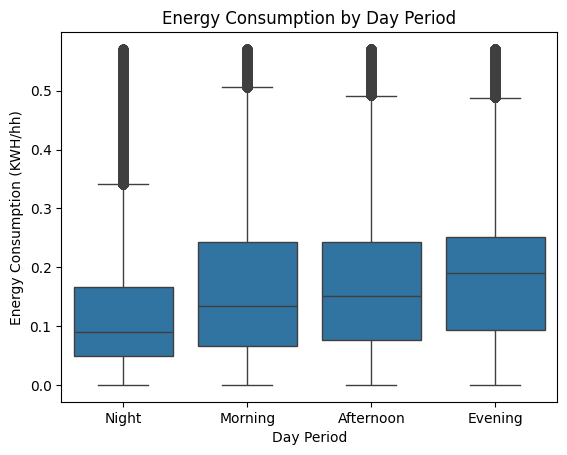

In [618]:

# Create a box plot to visualize energy consumption by DayPeriod
sns.boxplot(x='DayPeriod', y='KWH/hh (per half hour) ', data=collecteddata)
plt.title('Energy Consumption by Day Period')
plt.xlabel('Day Period')
plt.ylabel('Energy Consumption (KWH/hh)')
plt.show()


# ***propotion tests for categorical***




**make athreshold based on knn to divided kwh/hh to high and low**

In [619]:
from sklearn.cluster import KMeans
energy_data = collecteddata[['KWH/hh (per half hour) ']].values.reshape(-1, 1)

# Apply K-means clustering (2 clusters: high and low energy)
kmeans = KMeans(n_clusters=2)
collecteddata['EnergyCluster'] = kmeans.fit_predict(energy_data)

# Get the centroids of the clusters
cluster_centroids = kmeans.cluster_centers_

# Calculate the threshold as the midpoint between the two cluster centers
threshold = np.mean(cluster_centroids)
print(f"Calculated Threshold: {threshold} kWh/hh")


# Label the data based on the threshold
collecteddata['kwh_Category'] = np.where(collecteddata['KWH/hh (per half hour) '] < threshold, 'Low', 'High')
collecteddata.drop('EnergyCluster', axis=1, inplace=True)

Calculated Threshold: 0.19487693726626198 kWh/hh



**Proportion of High Energy Consumption During Holidays vs. Non-Holidays**
* H0: The proportion of high energy consumption is the same during holidays and non-holidays.
* H1: The proportion of high energy consumption differs significantly between holidays and non-holidays.

In [620]:

from statsmodels.stats.proportion import proportions_ztest


In [621]:
# Proportion of high energy consumption during holidays and non-holidays
holiday_high_proportion = collecteddata[collecteddata['Is_Holiday'] == 'Holiday']['kwh_Category'].value_counts(normalize=True).get('High', 0)
nonholiday_high_proportion = collecteddata[collecteddata['Is_Holiday'] == 'Not Holiday']['kwh_Category'].value_counts(normalize=True).get('High', 0)

# Calculate the counts of high energy consumption during holidays and non-holidays
high_count = np.array([len(collecteddata[(collecteddata['Is_Holiday'] == 'Holiday') & (collecteddata['kwh_Category'] == 'High')]),
                       len(collecteddata[(collecteddata['Is_Holiday'] == 'Not Holiday') & (collecteddata['kwh_Category'] == 'High')])])

# Calculate the total number of records for holidays and non-holidays
cal_nobs = np.array([len(collecteddata[collecteddata['Is_Holiday'] == 'Holiday']),
                     len(collecteddata[collecteddata['Is_Holiday'] == 'Not Holiday'])])

# Perform the Z-test for proportions
stat, p_value = proportions_ztest(count=high_count, nobs=cal_nobs)

print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Hypothesis testing based on p-value
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in the proportion of high energy consumption between holidays and non-holidays.")
else:
    print("Fail to Reject H₀: There is no significant difference in the proportion of high energy consumption between holidays and non-holidays.")


Z-statistic: 5.283978576778193
P-value: 1.2640804018210103e-07
Reject H₀: There is a significant difference in the proportion of high energy consumption between holidays and non-holidays.


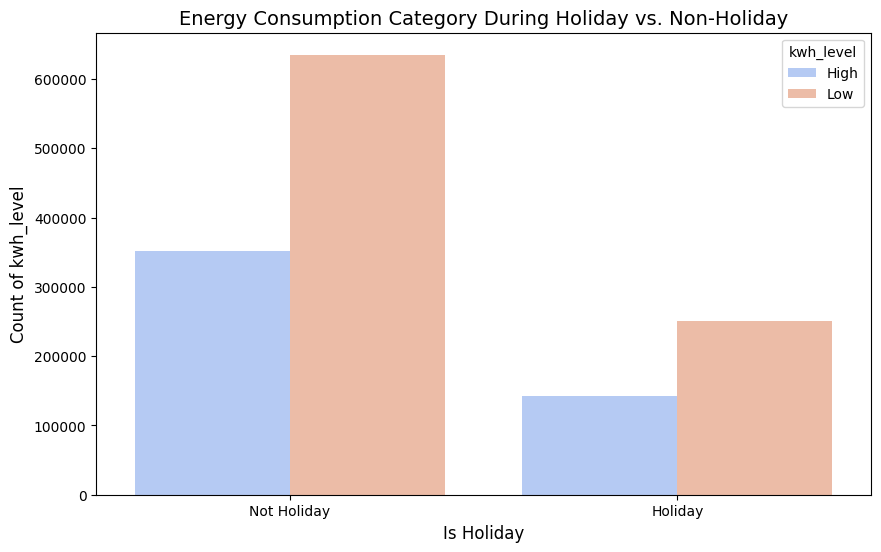

In [622]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=collecteddata,
    x='Is_Holiday',
    hue='kwh_Category',  # Show counts of each level for holidays vs. non-holidays
    palette='coolwarm'
)
plt.title('Energy Consumption Category During Holiday vs. Non-Holiday', fontsize=14)
plt.xlabel('Is Holiday', fontsize=12)
plt.ylabel('Count of kwh_level', fontsize=12)
plt.legend(title='kwh_level')
plt.show()



**Proportion of High Energy Consumption Across Regions**


* H0: The proportion of high energy consumption is the same across all regions.
* H1: The proportion of high energy consumption differs significantly across regions.



In [623]:
from scipy.stats import chi2_contingency

In [624]:
# Group data by 'region' and calculate counts for each kwh_Category (High, Low)
region_counts = collecteddata.groupby(['region', 'kwh_Category']).size().unstack(fill_value=0)

# Create a contingency table for Chi-Square Test
print("Contingency Table:")
print(region_counts)

# Perform the Chi-Square Test for Proportions
chi2, p_value, dof, expected = chi2_contingency(region_counts)


# Print Chi-Square Statistic and P-value
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

# Hypothesis testing based on p-value
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in the proportions of energy consumption levels (High, Low) across regions.")
else:
    print("Fail to Reject H₀: There is no significant difference in the proportions of energy consumption levels (High, Low) across regions.")


Contingency Table:
kwh_Category    High     Low
region                      
A             206725  334696
B             129114  308982
C             148822  215932
D               8360   26679
Chi-Square Statistic: 15121.142333963628
P-value: 0.0
Reject H₀: There is a significant difference in the proportions of energy consumption levels (High, Low) across regions.


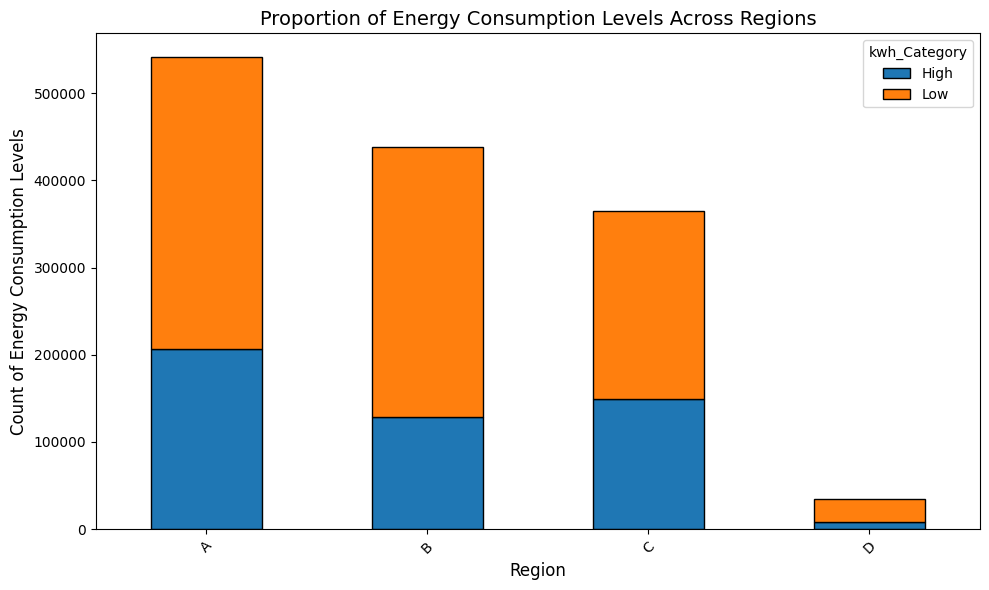

In [625]:
# Visualization: Stacked Bar Plot
region_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Colors for 'High', 'Low', 'Normal'
    edgecolor='black'
)

# Add chart title and labels
plt.title('Proportion of Energy Consumption Levels Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Energy Consumption Levels', fontsize=12)

# Set legend labels based on 'Demand' categories (High, Low, Normal)
plt.legend(title='kwh_Category', labels=['High', 'Low'], fontsize=10)

# Rotate region names for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Proportion of High Energy Consumption Across Time Periods (Morning, Afternoon, Evening, Night)**
* H0: The proportion of high energy consumption is the same across all time periods.
* H1: The proportion of high energy consumption differs significantly across time periods.

In [626]:
# Group data by 'DayPeriod' and 'kwh_Category' and calculate counts
dayperiod_counts = collecteddata.groupby(['DayPeriod', 'kwh_Category']).size().unstack(fill_value=0)

# Create a contingency table for Chi-Square Test
print("Contingency Table:")
print(dayperiod_counts)

# Perform the Chi-Square Test for Proportions
chi2_dayperiod, p_value_dayperiod, dof_dayperiod, expected_dayperiod = chi2_contingency(dayperiod_counts)

# Display the expected frequencies
print("Expected frequencies:")
print(expected_dayperiod)

# Print Chi-Square Statistic and P-value
print("Chi-Square Statistic (DayPeriod):", chi2_dayperiod)
print("P-value (DayPeriod):", p_value_dayperiod)

# Hypothesis testing based on p-value
if p_value_dayperiod < 0.05:
    print("Reject H₀: There is a significant difference in the proportions of energy consumption levels (High, Low) across day periods.")
else:
    print("Fail to Reject H₀: There is no significant difference in the proportions of energy consumption levels (High, Low) across day periods.")


Contingency Table:
kwh_Category    High     Low
DayPeriod                   
Afternoon     134913  209883
Evening       169081  175750
Morning       119318  225510
Night          69709  275146
Expected frequencies:
[[123243.9906301  221552.0093699 ]
 [123256.5010411  221574.4989589 ]
 [123255.42872016 221572.57127984]
 [123265.07960864 221589.92039136]]
Chi-Square Statistic (DayPeriod): 64641.96851124319
P-value (DayPeriod): 0.0
Reject H₀: There is a significant difference in the proportions of energy consumption levels (High, Low) across day periods.


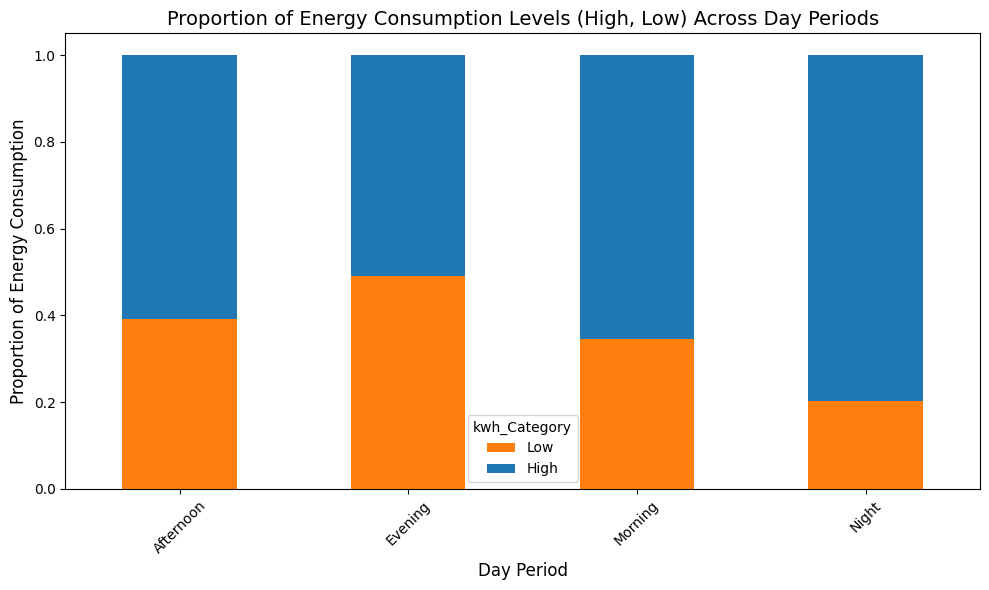

In [627]:
dayperiod_proportions = dayperiod_counts.div(dayperiod_counts.sum(axis=1), axis=0)

# Plot the proportions as a stacked bar chart
dayperiod_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff7f0e', '#1f77b4', '#2ca02c'])

# Add chart title and labels
plt.title('Proportion of Energy Consumption Levels (High, Low) Across Day Periods', fontsize=14)
plt.xlabel('Day Period', fontsize=12)
plt.ylabel('Proportion of Energy Consumption', fontsize=12)

# Set legend labels for better readability
plt.legend(title='kwh_Category', labels=['Low', 'High'], fontsize=10)

# Rotate day period labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# **Threshold Determination**

***i used the threshold before that to make the propotion test as threshold min to decrease the cost with the min low consumption***



```
energy_data = collecteddata[['KWH/hh (per half hour) ']].values.reshape(-1, 1)

# Apply K-means clustering (2 clusters: high and low energy)
kmeans = KMeans(n_clusters=2)
collecteddata['EnergyCluster'] = kmeans.fit_predict(energy_data)

# Get the centroids of the clusters
cluster_centroids = kmeans.cluster_centers_

# Calculate the threshold as the midpoint between the two cluster centers
threshold = np.mean(cluster_centroids)
print(f"Calculated Threshold: {threshold} kWh/hh")



# Label the data based on the threshold
collecteddata['kwh_Category'] = np.where(collecteddata['KWH/hh (per half hour) '] < threshold, 'Low', 'High')
collecteddata.drop('EnergyCluster', axis=1, inplace=True)
```



In [628]:
# Define the price map based on Demand
price_map = {
    'High': 77.21,   # price for High demand in pence per kWh
    'Normal': 19.46, # price for Normal demand in pence per kWh
    'Low': 6.89      # price for Low demand in pence per kWh
}
#calculate the price for each cell
collecteddata['price'] = collecteddata['Demand'].map(price_map)

#total cost for each cell in pens
collecteddata['total_cost'] = collecteddata['price'] * collecteddata['KWH/hh (per half hour) ']

#total cost for each cell in EGP
collecteddata['total_cost_EGP'] = (collecteddata['total_cost'] / 160)





**Cost Savings Calculation**

In [629]:
#using threshold median to shutdown cell
low_cluster_median = collecteddata[collecteddata['kwh_Category'] == 'Low']['KWH/hh (per half hour) '].median()

collecteddata['after_shutdowncells'] = np.where(collecteddata['KWH/hh (per half hour) '] < low_cluster_median, 0, collecteddata['KWH/hh (per half hour) '])
#after shutdown cell total cost EGP
collecteddata['total_cost_ASH_EGP'] = ((collecteddata['price'] * collecteddata['after_shutdowncells']) / 160)

print("total cost of Data before save opption:", collecteddata['total_cost_EGP'].sum())
print("total cost of Data after save opption:", collecteddata['total_cost_ASH_EGP'].sum())
print("cost saving:", collecteddata['total_cost_EGP'].sum() - collecteddata['total_cost_ASH_EGP'].sum())

total cost of Data before save opption: 29991.724866394376
total cost of Data after save opption: 27602.494304581887
cost saving: 2389.2305618124883


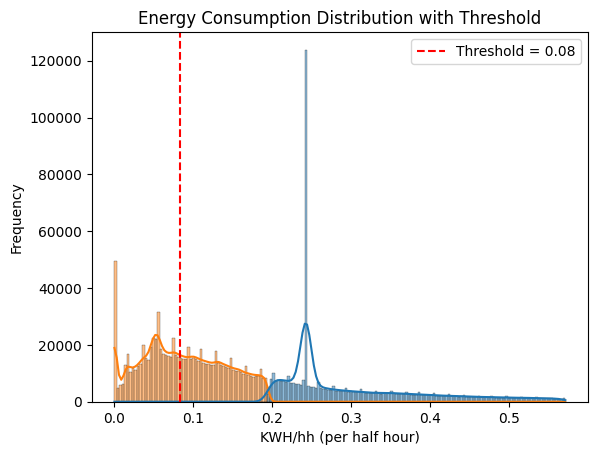

In [630]:
# Melt the data to create long-form data for the histplot
melted_data = pd.melt(
    collecteddata,
    id_vars=['kwh_Category'],  # Keep the 'kwh_Category' column for hue
    value_vars=['KWH/hh (per half hour) '],  # The variable to plot
    var_name='Variable',  # Name for the new variable column (optional)
    value_name='Value'  # Name for the new value column (optional)
)

# Plot the distribution of energy consumption with the melted data
sns.histplot(data=melted_data, x='Value', hue='kwh_Category', kde=True)
plt.axvline(low_cluster_median, color='red', linestyle='--', label=f"Threshold = {low_cluster_median:.2f}")
plt.title('Energy Consumption Distribution with Threshold')
plt.xlabel('KWH/hh (per half hour)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**The threshold derived from the median of the "Low" cluster ensures that it is robust and representative of the low-energy cells To Balance Between Savings and Operations Using the median avoids being overly aggressive (like the minimum) or too lenient (like the average)**

---



In [631]:
collecteddata.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,Date,Time,Year,Month,...,Is_Holiday,Hour,DayPeriod,AD_KWH/hh,kwh_Category,price,total_cost,total_cost_EGP,after_shutdowncells,total_cost_ASH_EGP
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,2013-01-01,00:00:00,2013,1,...,Not Holiday,0,Night,0,High,19.46,4.26174,0.026636,0.219,0.026636
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,2013-01-01,00:30:00,2013,1,...,Not Holiday,0,Night,0,High,19.46,4.68986,0.029312,0.241,0.029312
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,2013-01-01,01:00:00,2013,1,...,Not Holiday,1,Night,0,Low,19.46,3.71686,0.023230,0.191,0.023230
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,2013-01-01,01:30:00,2013,1,...,Not Holiday,1,Night,0,High,19.46,4.57310,0.028582,0.235,0.028582
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,2013-01-01,02:00:00,2013,1,...,Not Holiday,2,Night,0,Low,19.46,3.54172,0.022136,0.182,0.022136
